# Topic Modeling

### Import required libraries

In [1]:
# !pip install pyLDAvis # Uncomment and install this visualization library

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Data manipulation
import pandas as pd
import numpy as np
from collections import Counter
from pprint import pprint

# Data preprocessing & cleaning
import re
import string
from nltk.corpus import stopwords
from nltk import pos_tag, WordNetLemmatizer
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Modeling
import gensim

# Model Evaluation
from gensim.models import CoherenceModel

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim 

In [ ]:
plt.style.use('ggplot')
stop_words=stopwords.words('english')

Extend the list of stop words

In [ ]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use','know','dont'])

### Load dataset

In [ ]:
df=pd.read_csv("../datasets/tweets.csv")

In [ ]:
df.shape

Check first 5 rows 

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Drop unnecessary columns

In [8]:
df=df['clean_text','sentiment_polarity_color']

Rename columns

In [9]:
df.columns=['content','target']

In [10]:
df.head()

,target,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.head()

,target,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Check rows and columns

In [12]:
df.shape

(5572, 2)

### Preprocess Data

Convert the text into lower case

In [13]:
def convert_to_lower_case(text):
    return "".join([t.lower() for t in text])

In [14]:
df['content']=df['content'].apply(lambda x: convert_to_lower_case(x))

In [15]:
df.head()

,target,content
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


Remove emails

In [16]:
def remove_emails(text):
    data = ' '.join([item for item in text.split() if '@' not in item])
    return data

In [17]:
df['content']=df['content'].apply(lambda x: remove_emails(x))

In [18]:
df.head()

,target,content
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


Remove new line characters

In [19]:
def remove_line_character(text):
    data=text.rstrip()
    return data

In [20]:
df['content']=df['content'].apply(lambda x: remove_line_character(x))

In [21]:
df.head()

,target,content
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


Remove single quotes

Alternatively can use punctuation function

In [22]:
def remove_single_quotes(text):
    data=text.replace("'", "")
    return data

In [23]:
df['content']=df['content'].apply(lambda x: remove_single_quotes(x))

In [24]:
df.head()

,target,content
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i dont think he goes to usf, he lives arou..."


Remove Punctuations

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def remove_punctuation(text):
    return "".join([t for t in text if t not in string.punctuation])

In [27]:
df['content']=df['content'].apply(lambda x: remove_punctuation(x))

In [28]:
df.head()

,target,content
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


Remove words with less than 3 characters

In [29]:
def words_less_than_three_chars(text):
    return " ".join([t for t in text.split() if len(t)>2])

In [30]:
df['content']=df['content'].apply(lambda x: words_less_than_three_chars(x))

In [31]:
df.head()

,target,content
0,ham,until jurong point crazy available only bugis ...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts 21st m...
3,ham,dun say early hor already then say
4,ham,nah dont think goes usf lives around here though


Remove digits in data

In [32]:
df['content'].replace('\d+', '', regex=True, inplace=True)

<input>:1: DeprecationWarning: invalid escape sequence \d
<input>:1: DeprecationWarning: invalid escape sequence \d
<input>:1: DeprecationWarning: invalid escape sequence \d
<ipython-input-32-f2d5817ef051>:1: DeprecationWarning: invalid escape sequence \d
  df['content'].replace('\d+', '', regex=True, inplace=True)


Remove rows without data

In [33]:
df.drop(df[(df['content']=='') | (df['content']==' ')].index, inplace=True,axis=0)

In [34]:
df[df['content']=='']

,target,content


In [35]:
df.shape

(5546, 2)

Remove non-alpha numeric characters

In [36]:
def remove_non_alpha_numerics(text):
    alpha_num=' '.join([word for word in text.split() if word.isalpha()])
    return alpha_num

In [37]:
df['content']=df['content'].apply(lambda x: remove_non_alpha_numerics(x))

In [38]:
df.head()

,target,content
0,ham,until jurong point crazy available only bugis ...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts st may...
3,ham,dun say early hor already then say
4,ham,nah dont think goes usf lives around here though


Tokenize the text

In [39]:
def text_tokenizaion(text):
    return re.split(' ',text)

In [40]:
df['content']=df['content'].apply(lambda x: text_tokenizaion(x))

In [41]:
df.head()

,target,content
0,ham,"[until, jurong, point, crazy, available, only,..."
1,ham,"[lar, joking, wif, oni]"
2,spam,"[free, entry, wkly, comp, win, cup, final, tkt..."
3,ham,"[dun, say, early, hor, already, then, say]"
4,ham,"[nah, dont, think, goes, usf, lives, around, h..."


Remove stopword
Comment this section when using Extracts Nouns only function

In [42]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
def remove_stopwords(text):
    return [w for w in text if w not in stop_words]

In [44]:
df['content']=df['content'].apply(lambda x: remove_stopwords(x))

In [45]:
df.head()

,target,content
0,ham,"[jurong, point, crazy, available, bugis, great..."
1,ham,"[lar, joking, wif, oni]"
2,spam,"[free, entry, wkly, comp, win, cup, final, tkt..."
3,ham,"[dun, say, early, hor, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"


Extracts Nouns only

In [46]:
def extract_nouns(text):
    is_noun = lambda pos: pos[:2] == 'NN' or  pos[:2] == 'RB' or  pos[:2] == 'JJ'
    all_nouns = " ".join([word for (word, pos) in pos_tag(text) if is_noun(pos)])
    return all_nouns

In [47]:
df['content']=df['content'].apply(lambda x: extract_nouns(x))

In [48]:
df.head()

,target,content
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry comp win cup final tkts st receive ...
3,ham,dun early hor already
4,ham,nah think usf lives


In [49]:
df['content']=df['content'].apply(lambda x: text_tokenizaion(x))

Normalize text by Lemmatization

In [50]:
def text_lematization(text):
    return [WordNetLemmatizer().lemmatize(w) for w in text]

In [51]:
df['content']=df['content'].apply(lambda x: text_lematization(x))

In [52]:
df.head()

,target,content
0,ham,"[jurong, point, crazy, available, bugis, great..."
1,ham,"[lar, joking, wif, oni]"
2,spam,"[free, entry, comp, win, cup, final, tkts, st,..."
3,ham,"[dun, early, hor, already]"
4,ham,"[nah, think, usf, life]"


Convert data to list for modeling

In [53]:
data = df.content.values.tolist()
tokenized_data = df.content.values.tolist()

In [54]:
print(tokenized_data[0:2])

[['jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'buffet', 'cine', 'amore', 'wat'], ['lar', 'joking', 'wif', 'oni']]


### Create Data Input to Model

1. Create Dictionary

In [55]:
id2word = corpora.Dictionary(tokenized_data)

In [56]:
id2word

2. Create Corpus (Term Document Frequency)

In [57]:
corpus = [id2word.doc2bow(text) for text in tokenized_data]

In [58]:
print(corpus[0:2])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(11, 1), (12, 1), (13, 1), (14, 1)]]


Show corpus and frequency

In [59]:
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[('amore', 1), ('available', 1), ('buffet', 1), ('bugis', 1), ('cine', 1), ('crazy', 1), ('great', 1), ('jurong', 1), ('point', 1), ('wat', 1), ('world', 1)]]


### Modeling LDA Topic model

#### Latent Dirichlet allocation (LDA)

Latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model and belongs to the machine learning toolbox and in wider sense to the artificial intelligence toolbox. Source: <a href='https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation'>wikipedia</a>

In the LDA model below we specify chunksize which is the number of document to use for each training iteration/chunk. passes is the total number of training pass.

In [60]:
model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=6, random_state=100, update_every=1,
                                           chunksize=100,passes=10,alpha='auto',per_word_topics=True)

Show topics

Each keyword has a weighted importance value

In [61]:
pprint(model.print_topics())

[(0,
  '0.063*"call" + 0.038*"free" + 0.027*"mobile" + 0.023*"later" + '
  '0.020*"number" + 0.017*"claim" + 0.017*"phone" + 0.017*"sorry" + '
  '0.016*"min" + 0.015*"night"'),
 (1,
  '0.049*"ltgt" + 0.023*"pls" + 0.022*"stop" + 0.020*"really" + 0.018*"friend" '
  '+ 0.017*"message" + 0.017*"next" + 0.014*"" + 0.013*"shit" + '
  '0.013*"problem"'),
 (2,
  '0.033*"time" + 0.019*"still" + 0.018*"ill" + 0.016*"txt" + 0.016*"thats" + '
  '0.014*"cant" + 0.013*"want" + 0.013*"yeah" + 0.013*"soon" + 0.012*"work"'),
 (3,
  '0.025*"back" + 0.023*"great" + 0.023*"well" + 0.022*"new" + 0.016*"please" '
  '+ 0.015*"cash" + 0.013*"havent" + 0.013*"happy" + 0.013*"guy" + '
  '0.012*"wish"'),
 (4,
  '0.034*"day" + 0.026*"good" + 0.024*"text" + 0.024*"lor" + 0.021*"home" + '
  '0.020*"week" + 0.019*"today" + 0.015*"hey" + 0.013*"reply" + 0.013*"yes"'),
 (5,
  '0.022*"thing" + 0.020*"much" + 0.016*"babe" + 0.014*"also" + '
  '0.013*"something" + 0.012*"love" + 0.012*"school" + 0.010*"minute" + '
  '0.

### Model Evaluation

1. Model perplexity

In information theory, perplexity is a measurement of how well a probability distribution or probability model predicts a sample. It may be used to compare probability models. A low perplexity indicates the probability distribution is good at predicting the sample. <a href='https://en.wikipedia.org/wiki/Perplexity'>wikipedia</a>

In [62]:
model.log_perplexity(corpus)

-8.585864408770574

2. Topic Coherence 

Topic coherence is a metric that returns the coherene score with is a measure of the degree of semantic similarity between high scoring words in the topic

In [63]:
model_coherence = CoherenceModel(model=model, texts=tokenized_data, dictionary=id2word, coherence='c_v')

In [64]:
model_coherence.get_coherence()

0.46460550004033324

### Visualize the topics

In [65]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(model, corpus, id2word)

In [66]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.103590  0.284078       1        1  21.789291
2      0.230652 -0.089893       2        1  20.833622
0     -0.251241 -0.198824       3        1  17.568483
3      0.044415 -0.002882       4        1  14.215038
5      0.048137  0.006003       5        1  13.410891
1      0.031628  0.001518       6        1  12.182669, topic_info=     Category        Freq       Term       Total  loglift  logprob
term                                                              
64    Default  371.000000       call  371.000000  30.0000  30.0000
252   Default  199.000000       ltgt  199.000000  29.0000  29.0000
95    Default  250.000000        day  250.000000  28.0000  28.0000
114   Default  227.000000       time  227.000000  27.0000  27.0000
20    Default  256.000000       free  256.000000  26.0000  26.0000
328   Default  191.000000       good  191.000000  25.0000  25.0000
77    Default  157.000000     mobile  157.000000  24.0000  24.0000
426   Default  173.000000       text  173.000000  23.0000  23.0000
152   Default  172.000000        lor  172.000000  22.0000  22.0000
83    Default  155.000000       home  155.000000  21.0000  21.0000
317   Default  134.000000      later  134.000000  20.0000  20.0000
37    Default  117.000000       back  117.000000  19.0000  19.0000
45    Default  144.000000       week  144.000000  18.0000  18.0000
6     Default  110.000000      great  110.000000  17.0000  17.0000
254   Default  109.000000       well  109.000000  16.0000  16.0000
88    Default  137.000000      today  137.000000  15.0000  15.0000
44    Default  132.000000      still  132.000000  14.0000  14.0000
299   Default  103.000000        new  103.000000  13.0000  13.0000
534   Default  116.000000     number  116.000000  12.0000  12.0000
488   Default   99.000000      thing   99.000000  11.0000  11.0000
232   Default   94.000000        pls   94.000000  10.0000  10.0000
182   Default  124.000000        ill  124.000000   9.0000   9.0000
384   Default   90.000000       stop   90.000000   8.0000   8.0000
379   Default   91.000000       much   91.000000   7.0000   7.0000
65    Default  102.000000      claim  102.000000   6.0000   6.0000
963   Default  102.000000      phone  102.000000   5.0000   5.0000
27    Default  110.000000        txt  110.000000   4.0000   4.0000
194   Default  110.000000      thats  110.000000   3.0000   3.0000
164   Default   80.000000     really   80.000000   2.0000   2.0000
291   Default   97.000000      sorry   97.000000   1.0000   1.0000
...       ...         ...        ...         ...      ...      ...
252    Topic6  198.332703       ltgt  199.067093   2.1015  -3.0228
232    Topic6   93.690926        pls   94.425537   2.0973  -3.7728
384    Topic6   89.761375       stop   90.498108   2.0970  -3.8156
164    Topic6   79.734169     really   80.471756   2.0959  -3.9341
57     Topic6   74.801849     friend   75.537796   2.0954  -3.9979
122    Topic6   70.519653    message   71.253899   2.0948  -4.0569
123    Topic6   70.294029       next   71.031929   2.0947  -4.0601
249    Topic6   58.210770              58.945511   2.0926  -4.2487
1059   Topic6   53.181202    problem   53.917469   2.0914  -4.3391
1400   Topic6   53.550819       shit   54.297089   2.0913  -4.3321
50     Topic6   51.957260       even   52.694328   2.0911  -4.3624
326    Topic6   47.582172       pick   48.316559   2.0898  -4.4503
235    Topic6   46.637501    weekend   47.377514   2.0894  -4.4704
82     Topic6   43.805656      gonna   44.541950   2.0885  -4.5330
1002   Topic6   43.170685       game   43.908337   2.0882  -4.5476
781    Topic6   41.466499  important   42.203255   2.0875  -4.5879
133    Topic6   34.826138       fine   35.562069   2.0842  -4.7624
412    Topic6   30.463505    someone   31.197624   2.0813  -4.8962
1432   Topic6   29.574326     simple   30.316141   2.0804  -4.9259
1493   Topic6   28.135742   probably   28

##### Interpreting the Visual

Each bubble on the left graph represents a topic. The larger the bubble, the more prevalent is that topic. A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant. A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

### 1. Dominant topic in each sentence

To get the dominant topic in each sentence we compute the percentage contribution of each topic.

In [67]:
def topics_in_sentences(model=None, corpus=corpus, texts=data):
    # Initialize an empty dataframe
    sentence_topics_df = pd.DataFrame()

    # Loop through each document and each sentence to get the key topics
    for i, row_list in enumerate(model[corpus]):
        row = row_list[0] if model.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # For each document extract the topic percentage contribution and keywords
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # Dominant topic
                wp = model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sentence_topics_df = sentence_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sentence_topics_df.columns = ['Dominant_Topic', 'Pct_Contribution', 'Topic_Keywords']

    # Append original text to the end of the output
    contents = pd.Series(texts)
    sentence_topics_df = pd.concat([sentence_topics_df, contents], axis=1)
    return(sentence_topics_df)


sentence_topics_keywords_df = topics_in_sentences(model=model, corpus=corpus, texts=tokenized_data)

# Format
dominant_topic_df = sentence_topics_keywords_df.reset_index()
dominant_topic_df.columns = ['Document_No', 'Dominant_Topic', 'Topic_Pct_Contribution', 'Keywords', 'Text']

In [68]:
dominant_topic_df.head()

,Document_No,Dominant_Topic,Topic_Pct_Contribution,Keywords,Text
0,0,3.0,0.4184,"back, great, well, new, please, cash, havent, ...","[jurong, point, crazy, available, bugis, great..."
1,1,2.0,0.3167,"time, still, ill, txt, thats, cant, want, yeah...","[lar, joking, wif, oni]"
2,2,2.0,0.6296,"time, still, ill, txt, thats, cant, want, yeah...","[free, entry, comp, win, cup, final, tkts, st,..."
3,3,3.0,0.2648,"back, great, well, new, please, cash, havent, ...","[dun, early, hor, already]"
4,4,2.0,0.3209,"time, still, ill, txt, thats, cant, want, yeah...","[nah, think, usf, life]"


### 2. The most representative sentence for each topic

In [69]:
# pd.options.display.max_colwidth = 100

sorted_sentence_topics_df = pd.DataFrame()
grouped_sentence_topics_df = sentence_topics_keywords_df.groupby('Dominant_Topic')

for i, grp in grouped_sentence_topics_df:
    sorted_sentence_topics_df = pd.concat([sorted_sentence_topics_df, 
                                             grp.sort_values(['Pct_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sorted_sentence_topics_df.reset_index(drop=True, inplace=True)

# Format columns
sorted_sentence_topics_df.columns = ['Topic_Num', "Topic_Pct_Contrib", "Keywords", "Representative Text"]

In [70]:
sorted_sentence_topics_df.head(10)

,Topic_Num,Topic_Pct_Contrib,Keywords,Representative Text
0,0.0,0.7251,"call, free, mobile, later, number, claim, phon...","[december, mobile, mths, update, latest, colou..."
1,1.0,0.6478,"ltgt, pls, stop, really, friend, message, next...","[space, invader, chance, orig, arcade, game, c..."
2,2.0,0.7499,"time, still, ill, txt, thats, cant, want, yeah...","[height, confidence, aeronautics, professor, c..."
3,3.0,0.6096,"back, great, well, new, please, cash, havent, ...","[urgent, please, landline, complimentary, lux,..."
4,4.0,0.7132,"day, good, text, lor, home, week, today, hey, ...","[eerie, nokia, tone, tone, title, tone, dracul..."
5,5.0,0.6270,"thing, much, babe, also, something, love, scho...","[need, presnts, always, cant, mi, love, jeevit..."


### 3. Topic distribution across documents

In [71]:
# Number of Documents for Each Topic
topic_counts = sentence_topics_keywords_df['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sentence_topics_keywords_df[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
dominant_topics_df = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
dominant_topics_df.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Pct_Documents']

In [72]:
dominant_topics_df.head()

,Dominant_Topic,Topic_Keywords,Num_Documents,Pct_Documents
0,3.0,"back, great, well, new, please, cash, havent, ...",850.0,0.1533
1,2.0,"time, still, ill, txt, thats, cant, want, yeah...",504.0,0.0909
2,2.0,"time, still, ill, txt, thats, cant, want, yeah...",1776.0,0.3202
3,3.0,"back, great, well, new, please, cash, havent, ...",581.0,0.1048
4,2.0,"time, still, ill, txt, thats, cant, want, yeah...",1237.0,0.2230


### 4. Word Clouds of Top N Keywords in Each Topic

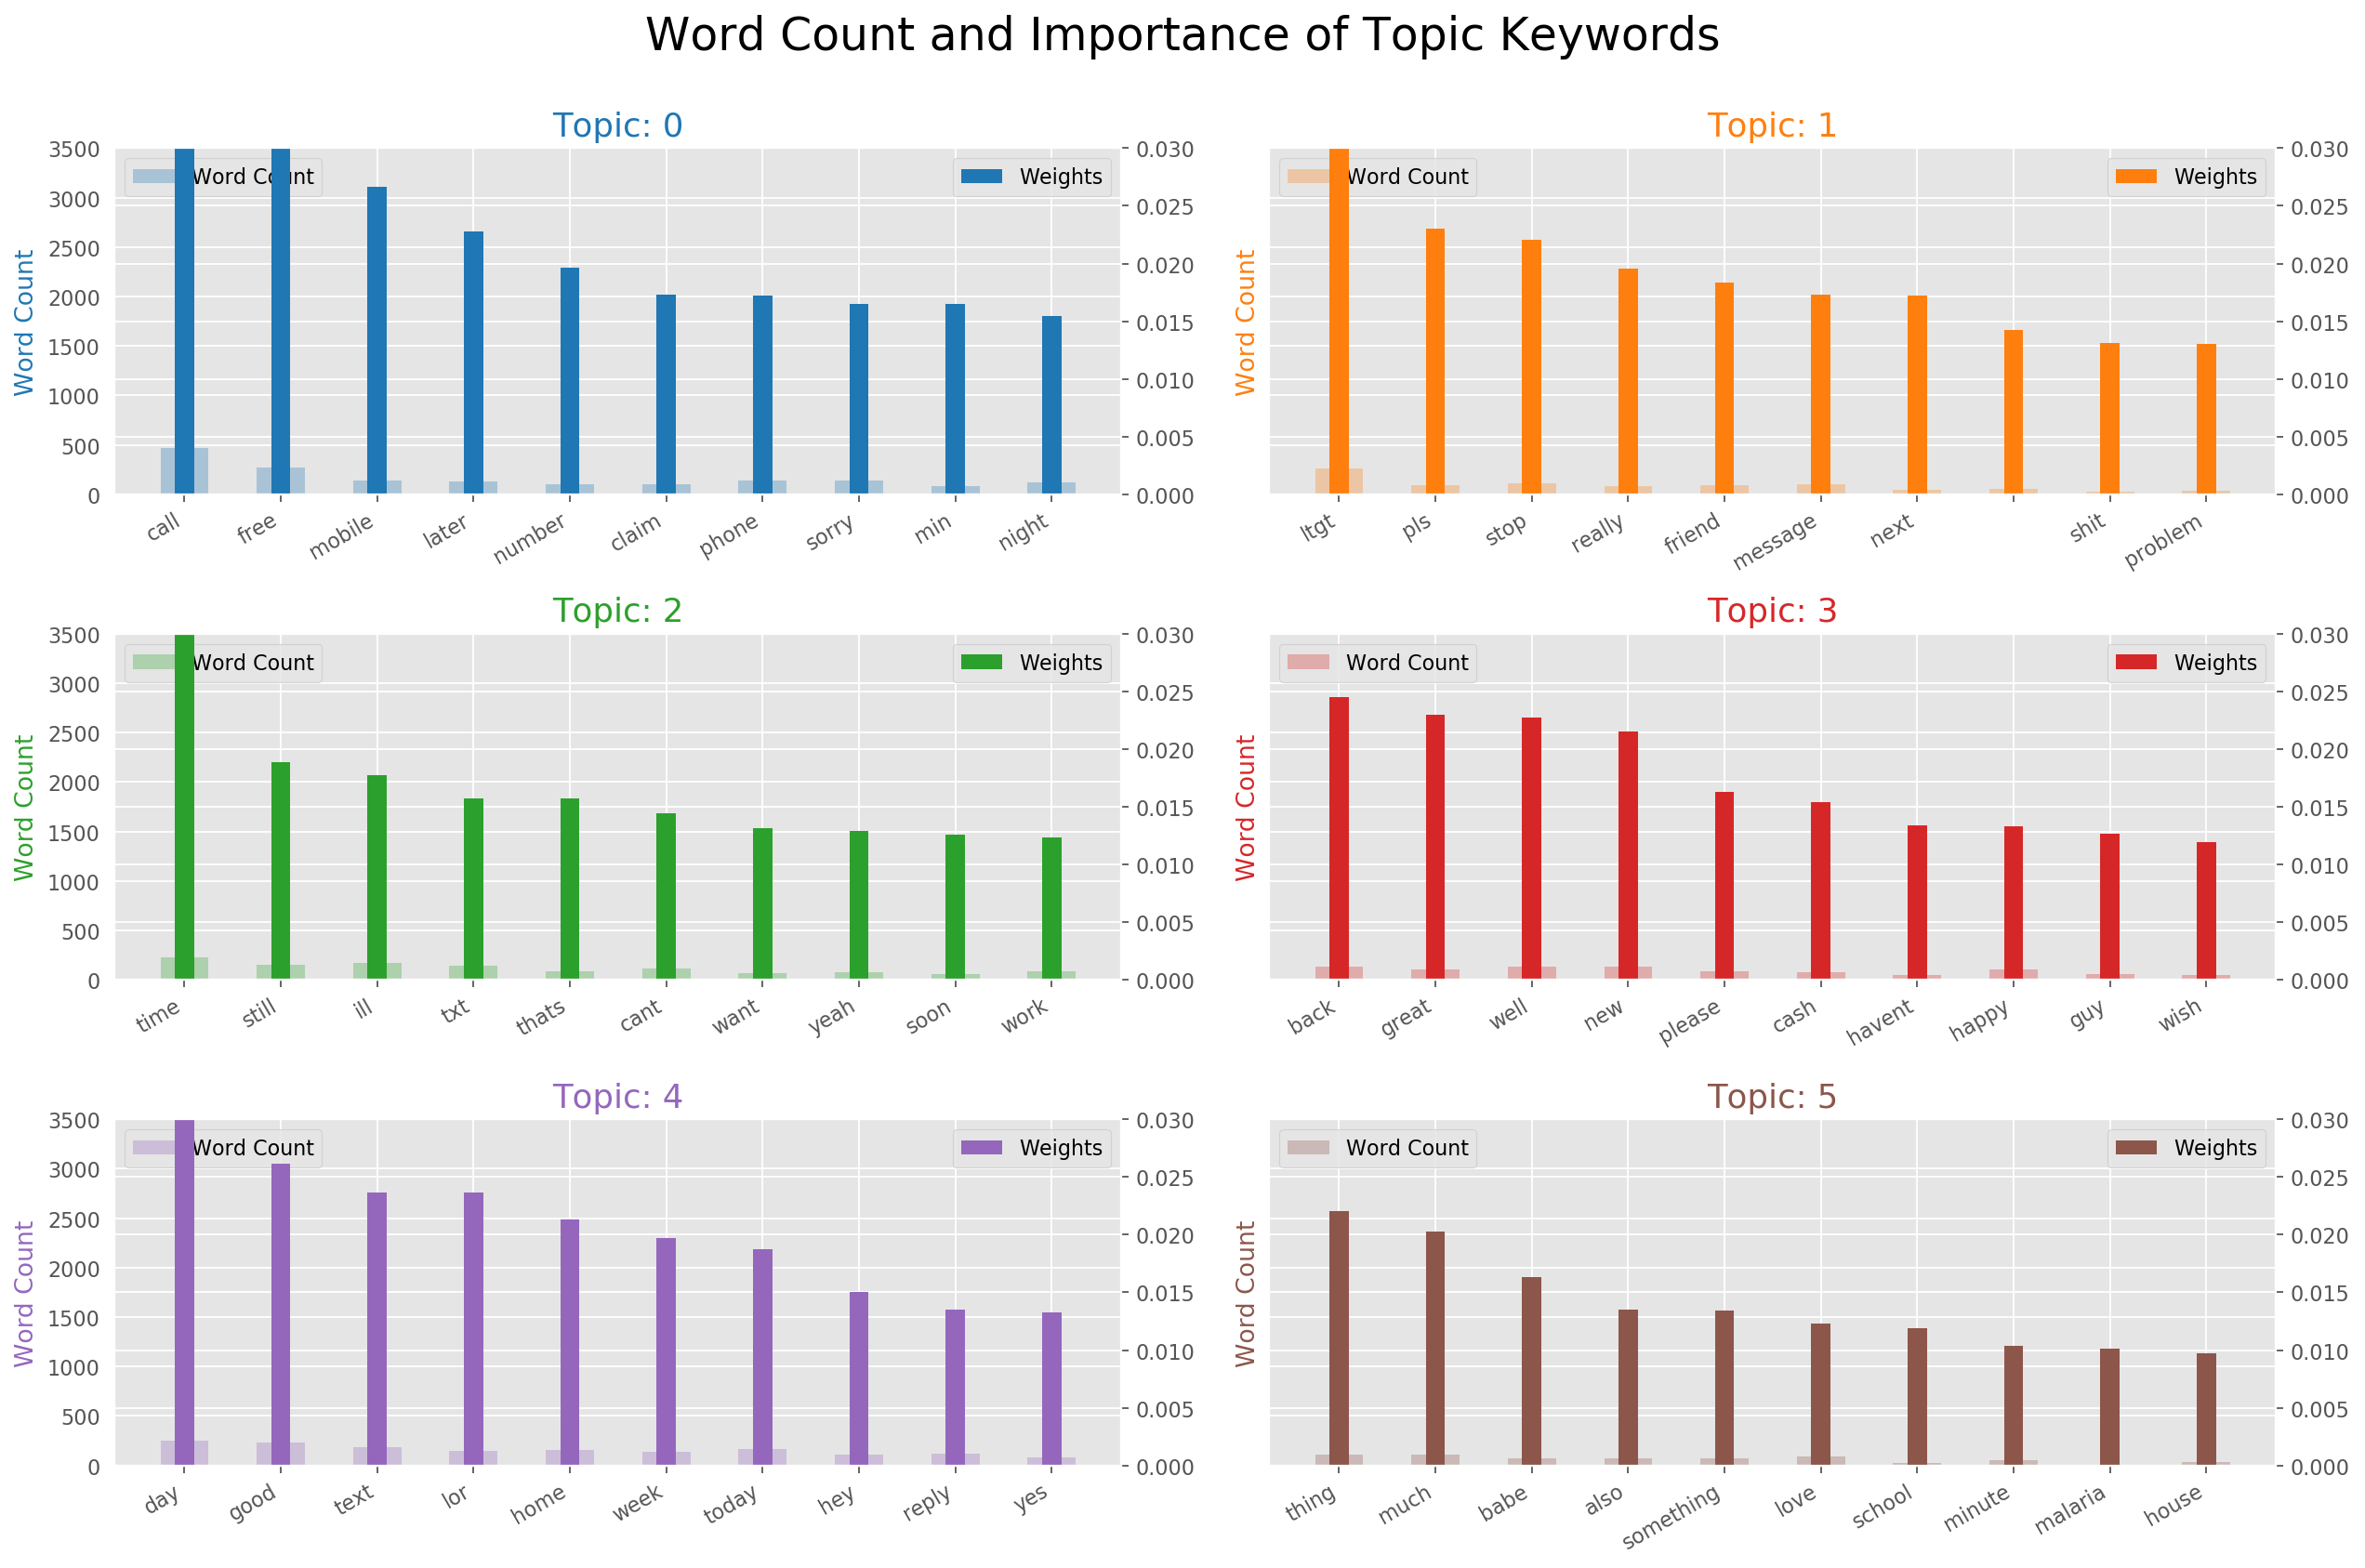

In [73]:
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in tokenized_data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

word_cloud_df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=word_cloud_df.loc[word_cloud_df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=word_cloud_df.loc[word_cloud_df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(word_cloud_df.loc[word_cloud_df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
    
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### 5. Most discussed topics in the documents

In [74]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

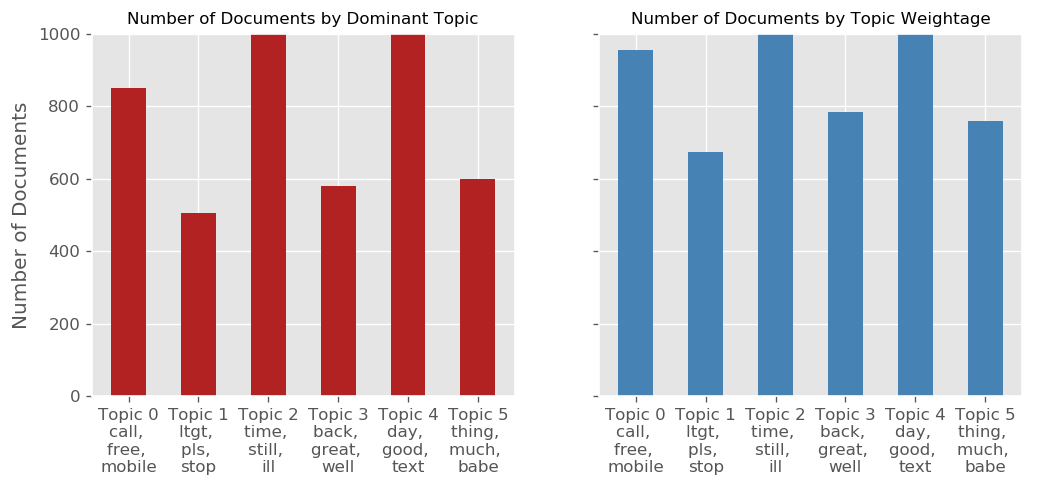

In [75]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))
plt.show()

### Model Tuning

Getting most optimal number of topics

In [76]:
limit=50; 
start=1; 
step=6;

In [77]:
def compute_optimal_topics(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [78]:
model_list, coherence_values = compute_optimal_topics(dictionary=id2word, corpus=corpus, texts=tokenized_data, start=start, limit=limit, step=step)

Vsualize

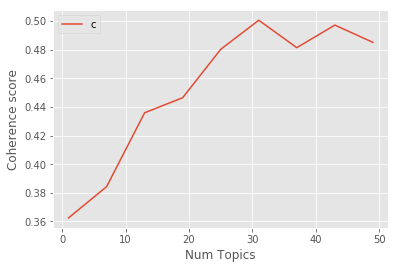

In [79]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Show topics and coherence values

In [80]:
for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 1  is having Coherence Value of 0.3625
Num Topics = 7  is having Coherence Value of 0.3843
Num Topics = 13  is having Coherence Value of 0.4359
Num Topics = 19  is having Coherence Value of 0.4464
Num Topics = 25  is having Coherence Value of 0.4802
Num Topics = 31  is having Coherence Value of 0.5005
Num Topics = 37  is having Coherence Value of 0.4814
Num Topics = 43  is having Coherence Value of 0.4971
Num Topics = 49  is having Coherence Value of 0.4851


### Conclusion

How to improve the model:<hr>
1. Improve on text processing.
2. The variety of topics the text talks about.
3. Topic modeling algorithm to use.
4. The number of topics to be retrieved from the algorithm.
5. The Model hyperparameter tuning.